# Word Vectors Lab
October 8
<br>
Exploring word vectors

## Part 1: Gensim

In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA   
from sklearn.manifold import TSNE

In [2]:
# read a file you have stored locally (Hunger Games)
file = open("hunger_games.txt", 'r').read()

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file = file.replace(char, " ")

# check
print(file[:100])

The Second Book of THE HUNGER GAMES     New York Times Bestsel ling Author   SUZHNNE  COLLINS     PA


In [3]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]
    
    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file)

# check
print(tokens[:10])

[['the', 'second', 'book', 'of', 'the', 'hunger', 'games', 'new', 'york', 'times', 'bestsel', 'ling', 'author', 'suzhnne', 'collins', 'parti', '``', 'the', 'spark', "''", '2', '|', 'p', 'a', 'g', 'e', 'catching', 'fire', '-', 'suzanne', 'collins', 'i', 'clasp', 'the', 'flask', 'between', 'my', 'hands', 'even', 'though', 'the', 'warmth', 'from', 'the', 'tea', 'has', 'long', 'since', 'leached', 'into', 'the', 'frozen', 'air', '.'], ['my', 'muscles', 'are', 'clenched', 'tight', 'against', 'the', 'cold', '.'], ['if', 'a', 'pack', 'of', 'wild', 'dogs', 'were', 'to', 'appear', 'at', 'this', 'moment', ',', 'the', 'odds', 'of', 'scaling', 'a', 'tree', 'before', 'they', 'attacked', 'are', 'not', 'in', 'my', 'favor', '.'], ['i', 'should', 'get', 'up', ',', 'move', 'around', ',', 'and', 'work', 'the', 'stiffness', 'from', 'my', 'limbs', '.'], ['but', 'instead', 'i', 'sit', ',', 'as', 'motionless', 'as', 'the', 'rock', 'beneath', 'me', ',', 'while', 'the', 'dawn', 'begins', 'to', 'lighten', 'the',

Will now establish Word2vec model. For each token given, which we have produced in the past block of code, we are defining it in the context of 100 words. AKA each vector will have 100 numbers in it representing the relationship between this word and 100 other words. The larger the number of words, the better.

In [5]:
model = Word2Vec(tokens,vector_size=100)

In [6]:
#Exploring the vocabulary
model.wv.key_to_index

{'.': 0,
 ',': 1,
 'the': 2,
 'i': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'of': 7,
 '``': 8,
 "''": 9,
 "'s": 10,
 'it': 11,
 'in': 12,
 'my': 13,
 'he': 14,
 'that': 15,
 'but': 16,
 "n't": 17,
 'me': 18,
 '?': 19,
 'on': 20,
 'with': 21,
 'you': 22,
 'we': 23,
 'for': 24,
 'is': 25,
 'peeta': 26,
 'his': 27,
 'be': 28,
 'as': 29,
 'do': 30,
 'at': 31,
 'have': 32,
 'they': 33,
 'says': 34,
 'from': 35,
 'out': 36,
 'what': 37,
 'him': 38,
 'so': 39,
 'her': 40,
 'up': 41,
 'can': 42,
 'fire': 43,
 'was': 44,
 'she': 45,
 'not': 46,
 'this': 47,
 'no': 48,
 'if': 49,
 'there': 50,
 'catching': 51,
 'are': 52,
 'one': 53,
 'collins': 54,
 'g': 55,
 'all': 56,
 'p': 57,
 '-': 58,
 'suzanne': 59,
 'e': 60,
 '|': 61,
 "'m": 62,
 'know': 63,
 'say': 64,
 'about': 65,
 'into': 66,
 'when': 67,
 'us': 68,
 'haymitch': 69,
 'just': 70,
 'finnick': 71,
 'will': 72,
 'them': 73,
 'back': 74,
 'has': 75,
 'think': 76,
 'then': 77,
 'by': 78,
 'see': 79,
 'an': 80,
 "'re": 81,
 'even': 82,
 'like': 83

In [7]:
#Picking a word from the corpus to see what vector is associated with it
model.wv.get_vector("capitol", norm=True)

array([ 4.27795015e-03,  1.13873549e-01,  2.66239159e-02, -6.33452013e-02,
        3.26335393e-02, -1.70174226e-01,  7.35234050e-03,  2.02895641e-01,
       -1.00699700e-01, -1.27955243e-01,  1.54578201e-02, -9.98837724e-02,
       -2.52483021e-02,  1.25240400e-01,  3.99523191e-02, -6.75776154e-02,
       -6.86689187e-03, -1.35641405e-02, -8.50561634e-02, -1.83063075e-01,
        2.04046909e-02, -2.50188354e-02,  7.97006488e-02, -9.51226056e-02,
        5.56105040e-02, -3.70314755e-02, -6.41993433e-02,  2.88334601e-02,
       -1.38770878e-01,  2.61209551e-02,  1.47244364e-01,  3.44749913e-02,
        1.75729655e-02, -5.98449931e-02,  1.81548353e-02,  1.04519971e-01,
        5.06424606e-02, -7.42009953e-02, -4.00472209e-02, -2.05241516e-01,
        2.99976431e-02, -1.20300926e-01, -1.15747405e-02,  2.25189291e-02,
        1.55620873e-01, -3.62346917e-02, -1.44599542e-01, -4.15098891e-02,
        1.10740729e-01, -4.74636545e-05,  1.22868530e-01, -1.38048619e-01,
       -2.07167603e-02,  

In [8]:
#Running similar words to "capitol"
model.wv.most_similar('capitol')

[('arena', 0.9953651428222656),
 ('one', 0.9949585199356079),
 ('way', 0.9904676675796509),
 ('night', 0.9894617795944214),
 ('last', 0.988650381565094),
 ('other', 0.988554835319519),
 ('end', 0.9881858229637146),
 ('8', 0.987140953540802),
 ('games', 0.9853639006614685),
 ('life', 0.9851254820823669)]

In [9]:
model.wv.similarity('katniss', 'girl')

0.8145132

In [10]:
model.wv.similarity('peeta', 'home')

0.95235217

In [11]:
#Visualizing the result
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

In [13]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')
        
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels) 

## Part 2: GloVe

In [14]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
#Using 100d file in glove/6b to understand embeddings better
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [17]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [18]:
#picking words to experiment with
print(find_closest_embeddings(
    embeddings_dict["dog"]
)[:20])

['dog', 'cat', 'dogs', 'puppy', 'pet', 'horse', 'pig', 'cats', 'animal', 'rabbit', 'boy', 'goat', 'monkey', 'rat', 'hound', 'breed', 'canine', 'sled', 'pets', 'puppies']


In [19]:
print(find_closest_embeddings(
    embeddings_dict["pigeon"]
)[:20])

['pigeon', 'pigeons', 'poodle', 'fanciers', 'pheasant', 'squirrel', 'pooch', 'pug', 'pea', 'rottweiler', 'tumbler', 'cat', 'poodles', 'tortoiseshell', 'kahrd', 'yorkie', 'albatross', 'raccoon', 'referees_blaine', 'mastiff']


In [20]:
#picking two words instead of just one
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["pigeon"]
)[:20])

['dog', 'pigeon', 'cat', 'dogs', 'horse', 'pet', 'rabbit', 'puppy', 'breed', 'terrier', 'cow', 'kennel', 'rat', 'sled', 'goat', 'squirrel', 'poodle', 'raccoon', 'hound', 'pig']


In [21]:
#picking three words - embeddings are triangulated
print(find_closest_embeddings(
    embeddings_dict["dog"] + embeddings_dict["pigeon"]
    + embeddings_dict["mouse"]
)[:20])

['dog', 'cat', 'mouse', 'pigeon', 'dogs', 'rabbit', 'pet', 'rat', 'horse', 'monkey', 'cow', 'terrier', 'pig', 'duck', 'breed', 'puppy', 'cats', 'squirrel', 'snake', 'bird']


In [22]:
#transforming dictionary into array for dimensionality reduction
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [23]:
#doing reduction with t-SNE
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

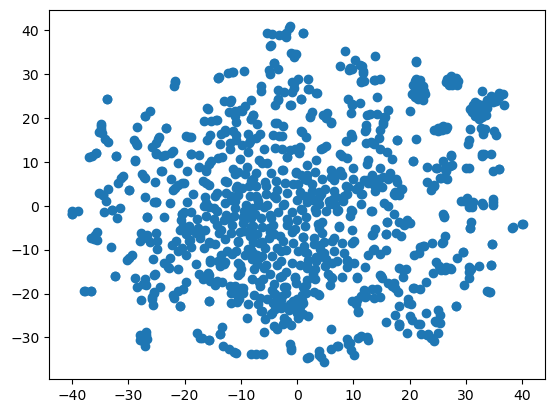

In [24]:
#plotting points
plt.scatter(Y[:, 0], Y[:, 1])

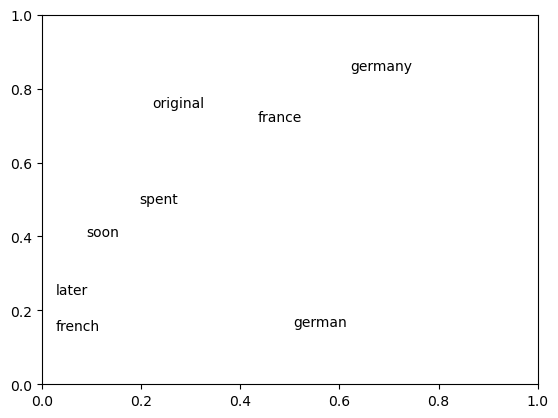

In [25]:
#annotating some of the words
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()